In [1]:
import pandas as pd

In [2]:
from pandas import Series,DataFrame

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
sns.set_style('whitegrid')

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.svm import SVC,LinearSVC

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
from sklearn.naive_bayes import GaussianNB

In [13]:
import xgboost as xgb

In [15]:
otto_df = pd.read_csv("./train.csv")

In [16]:
test_df = pd.read_csv("./test.csv")

In [17]:
otto_df.head()

id  feat_1  feat_2  feat_3  feat_4  feat_5  feat_6  feat_7  feat_8  feat_9  \
0   1       1       0       0       0       0       0       0       0       0   
1   2       0       0       0       0       0       0       0       1       0   
2   3       0       0       0       0       0       0       0       1       0   
3   4       1       0       0       1       6       1       5       0       0   
4   5       0       0       0       0       0       0       0       0       0   

    ...     feat_85  feat_86  feat_87  feat_88  feat_89  feat_90  feat_91  \
0   ...           1        0        0        0        0        0        0   
1   ...           0        0        0        0        0        0        0   
2   ...           0        0        0        0        0        0        0   
3   ...           0        1        2        0        0        0        0   
4   ...           1        0        0        0        0        1        0   

   feat_92  feat_93   target  
0        0        0  Class_1  
1        0        0  Class_1  
2        0        0  Class_1  
3        0        0  Class_1  
4        0        0  Class_1  

[5 rows x 95 columns]

In [18]:
sum_otto = otto_df.sum()

In [21]:
sum_otto.drop(['target','id']).order().plot(kind='barh',figsize=(15,20))

/Users/zhangtao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


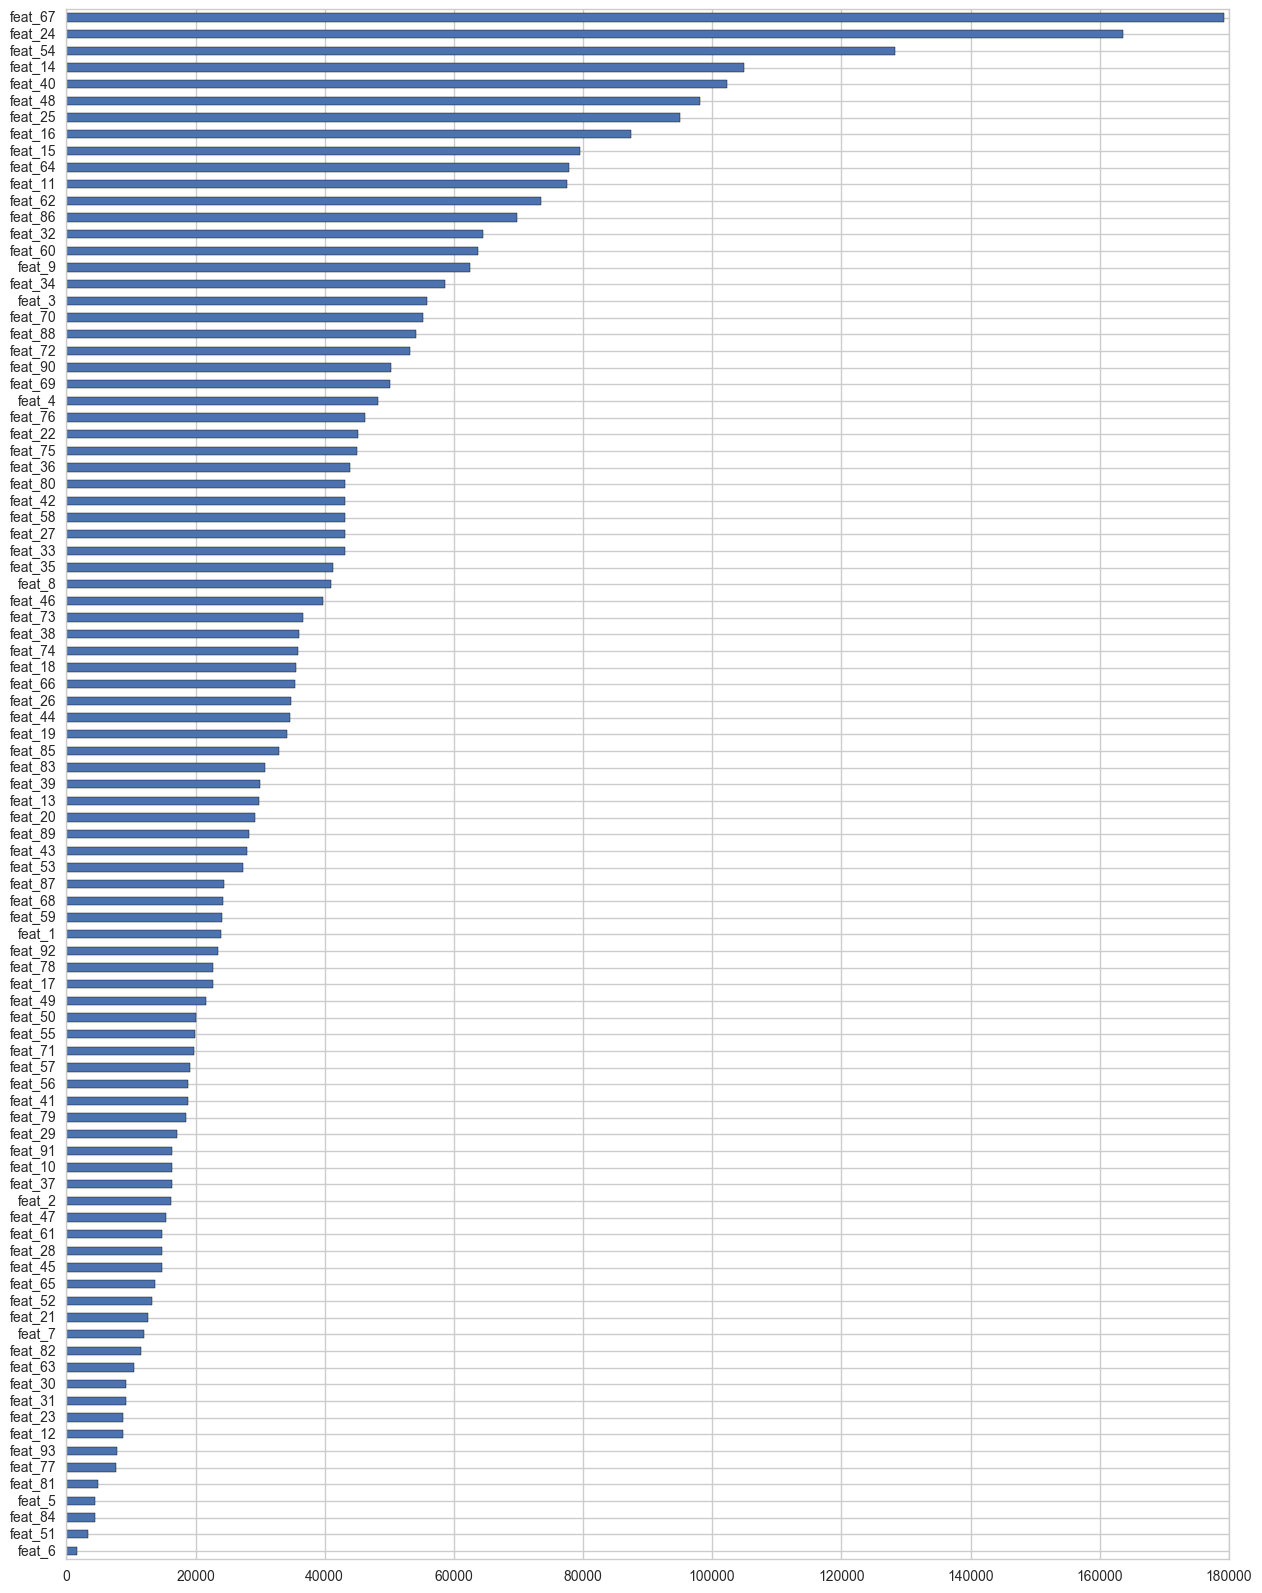

In [22]:
plt.show()

In [25]:
len(otto_df['target'].unique())

9

In [26]:
range_of_classes = range(1,10)

In [27]:
map_values_dic = {}

In [28]:
for n in range_of_classes:
    map_values_dic['Class_{}'.format(n)] = n-1

In [29]:
otto_df['target'] = otto_df['target'].map(map_values_dic)

In [30]:
sns.countplot(x = 'target',data = otto_df)

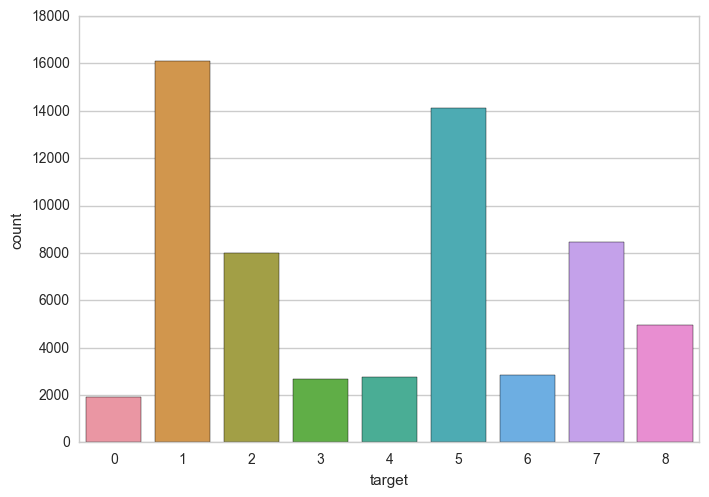

In [32]:
plt.show()

In [34]:
params = {"objective":"multi:softprob","num_class":9}
X_train = otto_df.drop(["id", "target"],axis=1)
Y_train = otto_df["target"].copy()
X_test  = test_df.drop("id",axis=1).copy()

In [35]:
T_train_xgb = xgb.DMatrix(X_train,Y_train)

In [36]:
X_test_xgb = xgb.DMatrix(X_test)

In [37]:
gbm = xgb.train(params,T_train_xgb,20)

In [39]:
Y_preb = gbm.predict(X_test_xgb)

In [40]:
submission = pd.DataFrame({"id":test_df["id"]})

In [41]:
i = 0


In [59]:
Y_preb[:,1].shape
    

(144368,)

In [47]:
Y_preb.shape

(144368, 9)

In [61]:
i = 0

# Create column name based on target values(see sample_submission.csv)
for num in range_of_classes:
    col_name = str("Class_{}".format(num))
    submission[col_name] = Y_preb[:,i]
    i = i + 1

In [62]:
submission


id   Class_1   Class_2   Class_3   Class_4   Class_5   Class_6  \
0            1  0.004308  0.228767  0.210220  0.517464  0.002072  0.010231   
1            2  0.067904  0.144746  0.041965  0.030591  0.009855  0.502248   
2            3  0.001296  0.000907  0.001118  0.000859  0.000361  0.984360   
3            4  0.008403  0.539400  0.319334  0.069979  0.004268  0.012172   
4            5  0.055436  0.008913  0.008640  0.005544  0.008100  0.021228   
5            6  0.005324  0.231364  0.716389  0.003862  0.002934  0.015013   
6            7  0.005748  0.006609  0.006191  0.015426  0.001237  0.012442   
7            8  0.007054  0.747080  0.151404  0.066475  0.003020  0.004978   
8            9  0.005793  0.397167  0.471219  0.077894  0.003968  0.007887   
9           10  0.063207  0.595030  0.075432  0.008667  0.028993  0.027079   
10          11  0.062955  0.262711  0.396139  0.073263  0.009863  0.043576   
11          12  0.073223  0.007189  0.004746  0.007410  0.002568  0.118798   
12          13  0.002415  0.002458  0.000709  0.001552  0.987014  0.001294   
13          14  0.022281  0.743972  0.071160  0.038713  0.007019  0.024210   
14          15  0.021528  0.455140  0.268091  0.042117  0.007585  0.036033   
15          16  0.128442  0.059955  0.040605  0.009966  0.007410  0.034947   
16          17  0.004522  0.001964  0.001257  0.002846  0.000671  0.979027   
17          18  0.001843  0.002656  0.001792  0.001531  0.000513  0.985659   
18          19  0.002072  0.002015  0.001017  0.002545  0.969423  0.016785   
19          20  0.005115  0.703273  0.195744  0.060238  0.003885  0.007421   
20          21  0.007370  0.007321  0.002823  0.009019  0.002150  0.948312   
21          22  0.081020  0.005911  0.005444  0.003520  0.003490  0.019083   
22          23  0.018048  0.479077  0.178234  0.218678  0.007739  0.020059   
23          24  0.062066  0.022323  0.015804  0.011419  0.006470  0.035066   
24          25  0.144941  0.020021  0.014127  0.010898  0.004910  0.114476   
25          26  0.046994  0.003775  0.006293  0.001893  0.001271  0.022425   
26          27  0.007463  0.174505  0.759550  0.031299  0.002221  0.006352   
27          28  0.007691  0.737659  0.174618  0.032227  0.003792  0.008355   
28          29  0.005873  0.730672  0.177237  0.018889  0.002676  0.042225   
29          30  0.005684  0.310888  0.634715  0.005407  0.002871  0.010560   
...        ...       ...       ...       ...       ...       ...       ...   
144338  144339  0.004555  0.660524  0.120268  0.035869  0.003229  0.005679   
144339  144340  0.001399  0.001712  0.001360  0.000835  0.000459  0.988543   
144340  144341  0.014151  0.519012  0.063451  0.216215  0.008139  0.041410   
144341  144342  0.003108  0.748791  0.154719  0.070521  0.002095  0.008757   
144342  144343  0.001400  0.001715  0.000963  0.001007  0.000390  0.989779   
144343  144344  0.005047  0.001114  0.001005  0.000462  0.000393  0.002537   
144344  144345  0.004933  0.835403  0.119320  0.009986  0.002744  0.005267   
144345  144346  0.004728  0.005667  0.002973  0.014291  0.001163  0.940904   
144346  144347  0.002124  0.001316  0.001301  0.000968  0.972548  0.001837   
144347  144348  0.005763  0.431100  0.410585  0.100708  0.003721  0.011961   
144348  144349  0.013783  0.582238  0.208217  0.126252  0.004342  0.022740   
144349  144350  0.005355  0.447422  0.485764  0.031142  0.003737  0.005933   
144350  144351  0.015509  0.009747  0.005869  0.012158  0.003674  0.893778   
144351  144352  0.009245  0.600531  0.297206  0.028373  0.005460  0.008999   
144352  144353  0.009980  0.892241  0.040058  0.005135  0.005512  0.014162   
144353  144354  0.049443  0.015094  0.014636  0.007887  0.004184  0.152487   
144354  144355  0.099279  0.130833  0.032332  0.020897  0.008882  0.311983   
144355  144356  0.009113  0.011798  0.003006  0.006717  0.001637  0.597160   
144356  144357  0.275726  0.003156  0.002976  0.002151  0.001459  0.008537   
144357  144358  0.000976  0.007527

In [63]:
submission.sum(axis = 1)

0              2.000000
1              3.000000
2              4.000000
3              5.000000
4              6.000000
5              7.000000
6              8.000000
7              9.000000
8             10.000000
9             11.000001
10            12.000000
11            13.000000
12            14.000000
13            14.999999
14            16.000000
15            17.000000
16            18.000002
17            18.999998
18            20.000000
19            21.000000
20            22.000000
21            23.000000
22            23.999998
23            25.000000
24            26.000002
25            27.000000
26            28.000000
27            29.000000
28            30.000000
29            31.000002
              ...      
144338    144340.000000
144339    144341.000000
144340    144342.000000
144341    144343.000000
144342    144344.000000
144343    144344.984375
144344    144345.984375
144345    144346.984375
144346    144348.000000
144347    144349.000000
144348    144350